In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Image

In [6]:
path_conf = "/home/giacomo/comp_bio/cbp_final/data/01_raw/02_NPT/04_npt_4/step5_prod_4.tpr"
path_traj = "/home/giacomo/comp_bio/cbp_final/data/02_processed/02_prod/prod_cat.xtc"
path_out = "/home/giacomo/comp_bio/cbp_final/data/03_analyzed/graphs/"
path_ini = out_path
path_pdb = "/home/giacomo/comp_bio/cbp_final/data/00_external/pdb_3EIG_prot.pdb"

In [47]:
def plot_heatmap(matrix,
                title = "title",
                xlabel = "Columns",
                ylabel = "Rows"):
    """
    Plots a heatmap for a given NumPy matrix with a colorbar.

    Parameters:
        matrix (numpy.ndarray): 2D array to visualize as a heatmap.
    """
    plt.figure(figsize=(6, 5))
    heatmap = plt.imshow(matrix, cmap='viridis', aspect='auto')
    plt.colorbar(heatmap, label='Value')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Calculation of interactions

In [7]:
os.system(f" pyinteraph -s {path_conf} -t {path_traj} -r {path_pdb} \
            --sb-co 5 -b --sb-graph {out_path}sb-graph.dat --ff-masses charmm27 \
            -v --sb-cg-file {ini_path}charged_groups.ini")

INFO: Gromacs version   : b'VERSION 2021.4'
INFO: tpx version       : 122
INFO: tpx generation    : 28
INFO: tpx precision     : 4
INFO: tpx file_tag      : b'release'
INFO: tpx natoms        : 36251
INFO: tpx ngtc          : 2
INFO: tpx fep_state     : 0
INFO: tpx lambda        : 0.0
INFO: 18 LYS (CE, NZ, HZ1, HZ2, HZ3)
INFO: 21 ASP (CG, OD1, OD2)
INFO: 28 ARG (CD, NE, CZ, NH1, HH11, HH12, NH2, HH21, HH22)
INFO: 30 GLU (CD, OE1, OE2)
INFO: 31 ARG (CD, NE, CZ, NH1, HH11, HH12, NH2, HH21, HH22)
INFO: 32 ARG (CD, NE, CZ, NH1, HH11, HH12, NH2, HH21, HH22)
INFO: 35 GLU (CD, OE1, OE2)
INFO: 36 ARG (CD, NE, CZ, NH1, HH11, HH12, NH2, HH21, HH22)
INFO: 44 GLU (CD, OE1, OE2)
INFO: 46 LYS (CE, NZ, HZ1, HZ2, HZ3)
INFO: 54 LYS (CE, NZ, HZ1, HZ2, HZ3)
INFO: 55 LYS (CE, NZ, HZ1, HZ2, HZ3)
INFO: 62 GLU (CD, OE1, OE2)
INFO: 63 LYS (CE, NZ, HZ1, HZ2, HZ3)
INFO: 65 ARG (CD, NE, CZ, NH1, HH11, HH12, NH2, HH21, HH22)
INFO: 68 LYS (CE, NZ, HZ1, HZ2, HZ3)
INFO: 70 ARG (CD, NE, CZ, NH1, HH11, HH12, NH2, HH21

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...


0

In [24]:
os.system(f" pyinteraph -s {path_conf} -t {path_traj} -r {path_pdb} \
            -y --hb-graph {out_path}hb-graph.dat --ff-masses charmm27 \
            -v --hb-ad-file {ini_path}hydrogen_bonds.ini")

INFO: Gromacs version   : b'VERSION 2021.4'
INFO: tpx version       : 122
INFO: tpx generation    : 28
INFO: tpx precision     : 4
INFO: tpx file_tag      : b'release'
INFO: tpx natoms        : 36251
INFO: tpx ngtc          : 2
INFO: tpx fep_state     : 0
INFO: tpx lambda        : 0.0
INFO: Will use 'name OH or name OG or name NE2 or name OG1 or name NE or name N or name ND1 or name NZ or name NH1 or name NH2 or name OW or name ND2 or name SG or name OH2 or name NE1' as selection for donors.
INFO: Will use 'name OH or name OG or name OD1 or name OD2 or name OG1 or name O or name ND1 or name NE2 or name OE2 or name OW or name SG or name OE1 or name OH2 or name SD' as selection for acceptors.
INFO: Running the hydrogen bonds analysis...
INFO: Choosing frames to analyze
INFO: Starting preparation
INFO: Finishing up
INFO: Done! Finalizing...


0

In [34]:
os.system(f" pyinteraph -s {path_conf} -t {path_traj} -r {path_pdb} \
            --hc-co 5 -f --hc-graph {out_path}hc-graph.dat --ff-masses charmm27 \
            -v --hc-residues ALA,VAL,LEU,ILE,PHE,PRO,MET,TRP")

INFO: Gromacs version   : b'VERSION 2021.4'
INFO: tpx version       : 122
INFO: tpx generation    : 28
INFO: tpx precision     : 4
INFO: tpx file_tag      : b'release'
INFO: tpx natoms        : 36251
INFO: tpx ngtc          : 2
INFO: tpx fep_state     : 0
INFO: tpx lambda        : 0.0
INFO: Selecting residues: ALA, VAL, LEU, ILE, PHE, PRO, MET, TRP
INFO: Chosen selections:
INFO: 9 ALA (HN, HA, CB, HB1, HB2, HB3)
INFO: 86 ALA (HN, HA, CB, HB1, HB2, HB3)
INFO: 96 ALA (HN, HA, CB, HB1, HB2, HB3)
INFO: 106 ALA (HN, HA, CB, HB1, HB2, HB3)
INFO: 124 ALA (HN, HA, CB, HB1, HB2, HB3)
INFO: 1 VAL (HT1, HT2, HT3, HA, CB, HB, CG1, HG11, HG12, HG13, CG2, HG21, HG22, HG23)
INFO: 8 VAL (HN, HA, CB, HB, CG1, HG11, HG12, HG13, CG2, HG21, HG22, HG23)
INFO: 10 VAL (HN, HA, CB, HB, CG1, HG11, HG12, HG13, CG2, HG21, HG22, HG23)
INFO: 43 VAL (HN, HA, CB, HB, CG1, HG11, HG12, HG13, CG2, HG21, HG22, HG23)
INFO: 50 VAL (HN, HA, CB, HB, CG1, HG11, HG12, HG13, CG2, HG21, HG22, HG23)
INFO: 74 VAL (HN, HA, CB, HB,

0

# Cutoff plots

## Salt bridges

In [28]:
os.system(f"filter_graph -d {path_out}sb-graph_all.dat -c {path_out}cluster_size_sb.dat \
            -p {path_out}clusters_plot_sb.png")

No handles with labels found to put in legend.


0

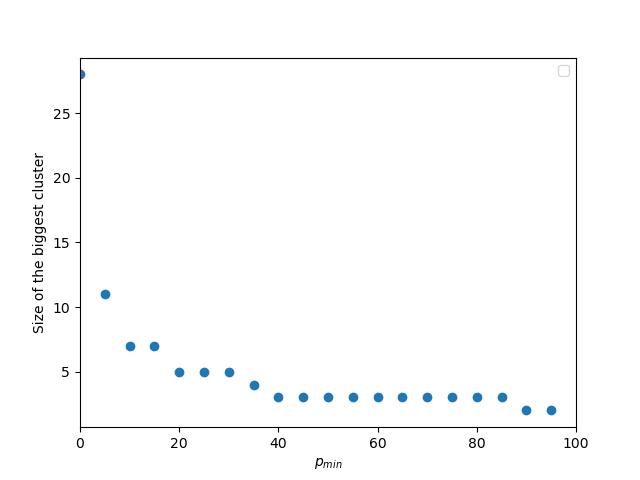

In [30]:
Image(f"{path_out}clusters_plot_sb.png")

## Hydrogen bonds

In [31]:
os.system(f"filter_graph -d {path_out}hb-graph_all.dat -c {path_out}cluster_size_hb.dat \
            -p {path_out}clusters_plot_hb.png")

No handles with labels found to put in legend.


0

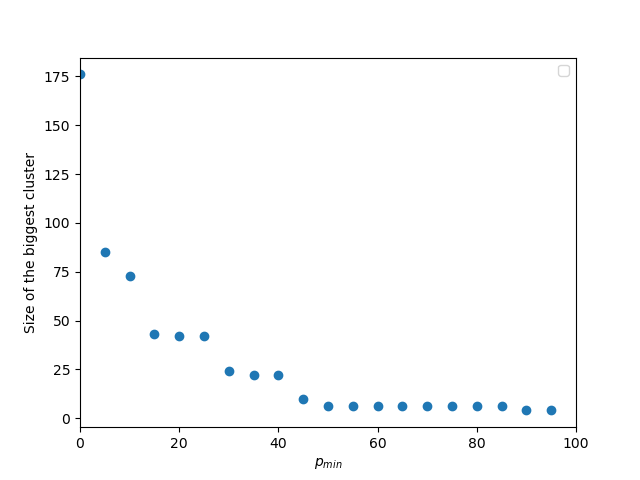

In [33]:
Image(f"{path_out}clusters_plot_hb.png")

## Hydrofobic interactions

In [35]:
os.system(f"filter_graph -d {path_out}hc-graph_all.dat -c {path_out}cluster_size_hc.dat \
            -p {path_out}clusters_plot_hc.png")

No handles with labels found to put in legend.


0

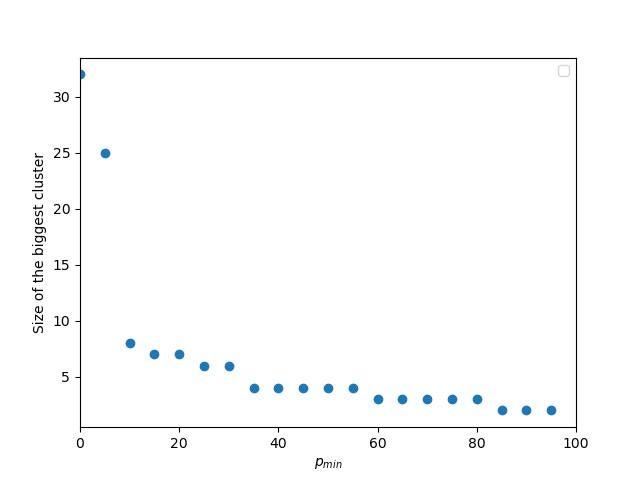

In [36]:
Image(f"{path_out}clusters_plot_hc.png")

# Filtering the graphs

In [40]:
os.system(f" filter_graph -d {path_out}hb-graph_all.dat -o {path_out}hb-graph_filtered.dat -t 40.0")

0

In [41]:
os.system(f" filter_graph -d {path_out}sb-graph_all.dat -o {path_out}sb-graph_filtered.dat -t 40.0")

0

In [42]:
os.system(f" filter_graph -d {path_out}hc-graph_all.dat -o {path_out}hc-graph_filtered.dat -t 40.0")

0

# Macro IIN

## Unweighted

In [43]:
os.system(f" filter_graph -d {path_out}hb-graph_filtered.dat -d {path_out}hc-graph_filtered.dat \
             -d {path_out}sb-graph_filtered.dat -o {path_out}macro_IIN_unweighted.dat")

0

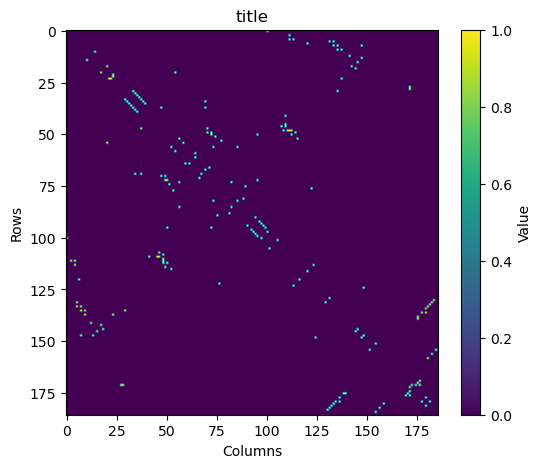

In [48]:
matrix = np.loadtxt(f"{path_out}macro_IIN_unweighted.dat", delimiter=" ")
plot_heatmap(matrix)

## Weighted

In [49]:
# generating the weights
os.system(f" pyinteraph -s {path_conf} -t {path_traj} -r {path_pdb} -p \
             --ff-masses charmm27 -v --kbp-graph {path_out}kbp-graph.dat")

INFO: Gromacs version   : b'VERSION 2021.4'
INFO: tpx version       : 122
INFO: tpx generation    : 28
INFO: tpx precision     : 4
INFO: tpx file_tag      : b'release'
INFO: tpx natoms        : 36251
INFO: tpx ngtc          : 2
INFO: tpx fep_state     : 0
INFO: tpx lambda        : 0.0
INFO: Loading potential definition...
INFO: Found 190 residue-residue interaction definitions.
INFO: Loading input files...


0

In [50]:
os.system(f" filter_graph -d {path_out}hb-graph_filtered.dat -d {path_out}hc-graph_filtered.dat \
             -d {path_out}sb-graph_filtered.dat -o {path_out}macro_IIN_weighted.dat -w {path_out}kbp-graph.dat")

0

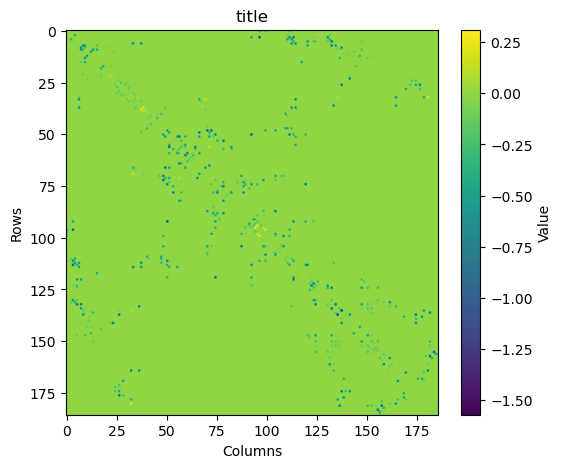

In [51]:
matrix_weighted = np.loadtxt(f"{path_out}macro_IIN_weighted.dat", delimiter=" ")
plot_heatmap(matrix_weighted)

# Connected components

In [53]:
os.system(f" graph_analysis -a {path_out}macro_IIN_weighted.dat \
             -r {path_pdb} -c -cb {path_out}ccs.pdb")

Graph loaded! 186 nodes, 444 edges
Node list: 
A-1VAL
A-10VAL
A-100THR
A-101GLU
A-102GLN
A-103PRO
A-104GLU
A-105LEU
A-106ALA
A-107ASN
A-108LYS
A-109VAL
A-11SER
A-110ASP
A-111MET
A-112VAL
A-113TRP
A-114ILE
A-115VAL
A-116GLY
A-117GLY
A-118SER
A-119SER
A-12GLN
A-120VAL
A-121TYR
A-122LYS
A-123GLU
A-124ALA
A-125MET
A-126ASN
A-127HIS
A-128PRO
A-129GLY
A-13ASN
A-130HIS
A-131LEU
A-132LYS
A-133LEU
A-134PHE
A-135VAL
A-136THR
A-137ARG
A-138ILE
A-139MET
A-14MET
A-140GLN
A-141ASP
A-142PHE
A-143GLU
A-144SER
A-145ASP
A-146THR
A-147PHE
A-148PHE
A-149PRO
A-15GLY
A-150GLU
A-151ILE
A-152ASP
A-153LEU
A-154GLU
A-155LYS
A-156TYR
A-157LYS
A-158LEU
A-159LEU
A-16ILE
A-160PRO
A-161GLU
A-162TYR
A-163PRO
A-164GLY
A-165VAL
A-166LEU
A-167SER
A-168ASP
A-169VAL
A-17GLY
A-170GLN
A-171GLU
A-172GLU
A-173LYS
A-174GLY
A-175ILE
A-176LYS
A-177TYR
A-178LYS
A-179PHE
A-18LYS
A-180GLU
A-181VAL
A-182TYR
A-183GLU
A-184LYS
A-185ASN
A-186ASP
A-19ASN
A-2GLY
A-20GLY
A-21ASP
A-22LEU
A-23PRO
A-24TRP
A-25PRO
A-26PRO
A-27LEU
A-28ARG
A-29

0

# Hubs

In [54]:
os.system(f" graph_analysis -a {path_out}macro_IIN_weighted.dat \
             -r {path_pdb} -u -ub {path_out}hubs.pdb -k 3")

Graph loaded! 186 nodes, 444 edges
Node list: 
A-1VAL
A-10VAL
A-100THR
A-101GLU
A-102GLN
A-103PRO
A-104GLU
A-105LEU
A-106ALA
A-107ASN
A-108LYS
A-109VAL
A-11SER
A-110ASP
A-111MET
A-112VAL
A-113TRP
A-114ILE
A-115VAL
A-116GLY
A-117GLY
A-118SER
A-119SER
A-12GLN
A-120VAL
A-121TYR
A-122LYS
A-123GLU
A-124ALA
A-125MET
A-126ASN
A-127HIS
A-128PRO
A-129GLY
A-13ASN
A-130HIS
A-131LEU
A-132LYS
A-133LEU
A-134PHE
A-135VAL
A-136THR
A-137ARG
A-138ILE
A-139MET
A-14MET
A-140GLN
A-141ASP
A-142PHE
A-143GLU
A-144SER
A-145ASP
A-146THR
A-147PHE
A-148PHE
A-149PRO
A-15GLY
A-150GLU
A-151ILE
A-152ASP
A-153LEU
A-154GLU
A-155LYS
A-156TYR
A-157LYS
A-158LEU
A-159LEU
A-16ILE
A-160PRO
A-161GLU
A-162TYR
A-163PRO
A-164GLY
A-165VAL
A-166LEU
A-167SER
A-168ASP
A-169VAL
A-17GLY
A-170GLN
A-171GLU
A-172GLU
A-173LYS
A-174GLY
A-175ILE
A-176LYS
A-177TYR
A-178LYS
A-179PHE
A-18LYS
A-180GLU
A-181VAL
A-182TYR
A-183GLU
A-184LYS
A-185ASN
A-186ASP
A-19ASN
A-2GLY
A-20GLY
A-21ASP
A-22LEU
A-23PRO
A-24TRP
A-25PRO
A-26PRO
A-27LEU
A-28ARG
A-29

0

# Generating graphs

In [55]:
os.system(f" dat2graphml -a {path_out}macro_IIN_weighted.dat -r {path_pdb} -o {path_out}graph.graphml")

0